<a href="https://colab.research.google.com/github/adilsonvj/SME0130---Redes-Complexas-/blob/main/Redes_Complexas_Question%C3%A1rio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://web.icmc.usp.br/SCAPINST/identidade_visual/logomarca/LOGO%20ICMC%20RGB.png" height="200"/>
</div>

# Questionário: – Distância e Correlação

**Disciplina**: Redes Complexas SME0130 / 1º Semestre 2021
**Professor**: Francisco Rodrigues
**Aluno**: Adilson Vital Junior
**Número** USP: 9278160

In [17]:
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy.stats import pearsonr

def get_first_lines(file_path, n_lines = 5):
  """
    Inputs:
      - file_path: string with the file path
      - n_lines: number of lines to print
    Outputs:
      - first "n_lines" of the file located in "file_path"
  """
  with open(file_path, "r") as file:
    count = 0
    for line in file:
      if count == n_lines:
        break
      else:
        print(line)
        count = count + 1

def create_network_by_txt(file_path, weighted = False):
  """
    Inputs:
      - file_path: File with the path of the .txt file for the graph
      - weighted: Bool variable if the network is weighted or not.
    Outputs:
      - G: Graph already loaded 
  """
  G = nx.Graph()
  with open(file_path,"r") as file:
    for line in file: 
      line = line.replace("\n", "").split(" ")
      if weighted:
        G.add_edge(line[0], line[1], weight = line[2])
      else:
        G.add_edge(line[0], line[1])
  return G

def plot_network(G):
  """
    Inputs:
      - G: Graph to plot
    Outputs:
      - Return the plot of the network G
  """
  plt.figure(figsize=(10,5))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, node_size = 200, node_color = "yellow", pos = pos, alpha= 0.5)
  nx.draw_networkx_edges(G, width = 0.5, pos = pos, alpha = 0.5)
  nx.draw_networkx_labels(G, pos = pos, font_weight = "bold")
  plt.show()

def get_network_description(G):
  print("A rede é formada por", len(G.nodes()), "Nós e", len(G.edges()), "Arestas")

def preprocess_graph(G, to_undirected = True, remove_selfloop = True, major_component = True, relabel = True):
  """
    Inputs:
      - G: Graph to be preprocessed
    Outputs:
      - G: Graph already preprocessed
  """
  if to_undirected:
    G = G.to_undirected()
  if remove_selfloop:
    G.remove_edges_from(nx.selfloop_edges(G))
  if major_component:
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
  if relabel:
    G = nx.convert_node_labels_to_integers(G, first_label=0)
  return G

def shannon_entropy(P_k_list):
  """
    Inputs:
      - P_k_list: List of probabilities of each degree to be selected
    Outputs:
      - H: Shannon Entropy
  """
  H = 0
  for p in P_k_list:
      if(p > 0):
          H = H - p*math.log(p, 2)
  return H

def distance_matrix(G):
  """
    Inputs:
      - G: Graph to extract the distance matrix
    Outputs:
      - D (or None): Distance matrix in the case of the graph G is connected, or 
      None otherwise.
  """
  if nx.is_connected(G):
    N = len(G.nodes())
    D = np.zeros((N, N))
    Nodes_list = G.nodes()
    for u in Nodes_list:
      for v in Nodes_list:
        if u != v:
          D[u][v] = len(nx.shortest_path(G, u, v)) - 1
          D[v][u] = len(nx.shortest_path(G, u, v)) - 1
    return D

  else:
    print("Graph G not connected")
    return None

def upper_triangle_values(M):
  """
    Inputs:
      - M: Matrix to get the values of the upper triangle
    Outputs:
      - upper_triangle_list: List with the upper triangle values
  """
  upper_triangle_list = []
  N = M.shape[0]
  for i in np.arange(0, N):
    for j in np.arange(i+1, N):
      upper_triangle_list.append(M[i][j])
  return upper_triangle_list

def plot_hist_mean_std(x):
  fig, axes = plt.subplots(figsize=(8, 4))
  sns.kdeplot(x, shade=False, color='crimson', levels = 1)
  kdeline = axes.lines[0]
  xs = kdeline.get_xdata()
  ys = kdeline.get_ydata()
  middle = np.mean(x)
  sdev = np.std(x)
  var = np.var(x)
  left = middle - sdev
  right = middle + sdev
  axes.set_title('Showing mean and sdev')
  axes.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':')
  axes.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
  axes.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='crimson', alpha=0.4)
  plt.show()

  return middle, sdev, var

def get_prob_by_term(list_):
  """
    Inputs:
      - list_: List of values to extract the frequency of each term
    Outputs:
      - values_arr: Array with the possible values
      - P_arr: Probabilities associated with frequency of value
  """
  counter_frequency = Counter(list_)
  values_arr = np.array(list(counter_frequency.keys()))
  P_arr = np.array(list(counter_frequency.values()))
  P_arr = P_arr / sum(P_arr)
  return values_arr, P_arr

def assortativity_degree_degree(G):
  """
    Inputs: 
      - G: Graph to extract the assortativity 
    Outputs:  
      - corr: Pearson correlation (or assortativity) between the graph 
      degree-degree of the nodes already connected in the graph G
  """
  ku_list = []
  kv_list = []
  nodes_list = G.nodes()
  for u in nodes_list:
      for v in nodes_list:
          if G.has_edge(u, v):
              ku_list.append(G.degree(u))
              kv_list.append(G.degree(v))

  corr, _ = pearsonr(ku_list, kv_list)
  return ku_list, kv_list, corr

def plot_scatter_linear_app(list_x, list_y, text_linear):
  plt.scatter(list_x, list_y, s = 20, alpha = 0.8, c = "grey")
  coef = np.polyfit(list_x, list_y, 1)
  poly1d_fn = np.poly1d(coef) 
  x = np.arange(min(list_x), max(list_x))
  y = poly1d_fn(x)
  plt.scatter(x, y, s = 1, c = "red")
  text_x = int(len(x)/10)
  plt.text(x[text_x], y[text_x], text_linear, fontsize = 18)
  plt.show()

def get_knn_k(G):
  
  knn = np.array(list(nx.average_neighbor_degree(G).values()))

  vk = dict(G.degree())
  vk = list(vk.values())

  knnk = list()
  ks = list()

  for k in np.arange(np.min(vk), np.max(vk)):
      aux = vk == k
      if(len(knn[aux]) > 0):
          av_knn = np.mean(knn[aux]) #average clustering among all the nodes with degree k
          knnk.append(av_knn)
          ks.append(k)

  rho, _ = pearsonr(ks, knnk)
  return ks, knnk, rho

### **1. Para a rede “Hamsterster”, calcule a média dos menores caminhos e o diâmetro. Use apenas o maior componente da rede e remova ciclos ou auto-conexões**

Primeiro, vamos abrir os dados e printar as primeiras 5 linhas de forma a entender o que está contido nestes dados.

In [ ]:
path_hamst = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/hamsterster.txt"
get_first_lines(path_hamst, n_lines = 5)

99 98

999 550

999 42

999 25

998 996



As linhas são formadas por origem e destino, sem a presença de pesos.

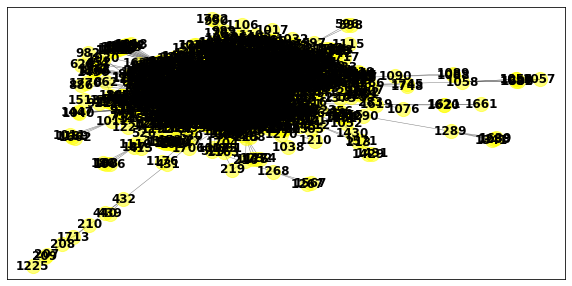

A rede é formada por 1788 Nós e 12476 Arestas


In [ ]:
G_hamst = create_network_by_txt(path_hamst, weighted = False)
G_hamst_ppg = preprocess_graph(G_hamst)
plot_network(G_hamst_ppg)
get_network_description(G_hamst_ppg)

In [ ]:
D = distance_matrix(G_hamst_ppg)
shortest_path_values = upper_triangle_values(D)

In [ ]:
avg_shortest_path = np.mean(shortest_path_values)
diameter = np.max(shortest_path_values)
print("A média das menores distâncias é", "%.2f"%avg_shortest_path, "e o diâmetro é", "%.2f"%diameter)

A média das menores distâncias é 3.45 e o diâmetro é 14.00


Com isso, conseguimos observar que apesar da média das menores distâncias serem 3.45, a maior menor distância, 14, ainda é bem maior que a média.

### **2. Considere a rede “USairport500” e calcule a média e variância dos menores caminhos. Use apenas o maior componente da rede e remova ciclos ou autoconexões**

Assim como no arquivo anterior, vamos novamente observar as primeiras linhas do arquivo para entender os nossos dados.

In [ ]:
path_USairport = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/USairport500.txt"
get_first_lines(path_USairport, n_lines = 5)

1 111

1 49

1 283

1 177

1 72



Novamente a rede é formada apenas por nós de origem e destino, portanto sem pesos.

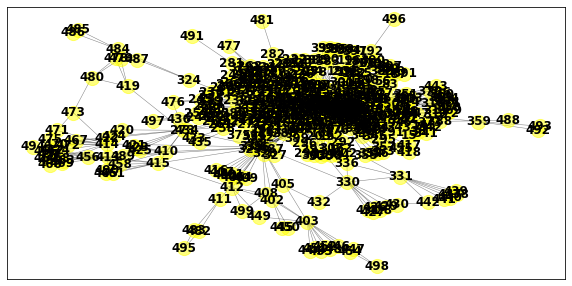

A rede é formada por 500 Nós e 2980 Arestas


In [ ]:
G_USairport = create_network_by_txt(path_USairport, weighted = False)
G_USairport_ppg = preprocess_graph(G_USairport)
plot_network(G_USairport_ppg)
get_network_description(G_USairport_ppg)

In [ ]:
D = distance_matrix(G_USairport_ppg)
shortest_path_values = upper_triangle_values(D)

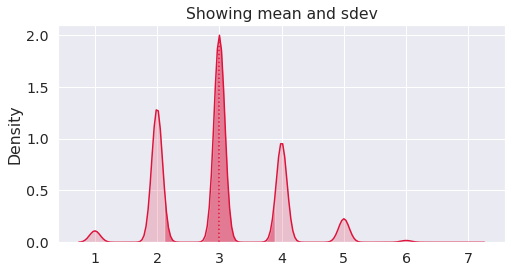

A média de menores distâncias para a rede US Airport500 é 2.991 e o desvio padrão é 0.904 e variância 0.818


In [ ]:
mean, std, var = plot_hist_mean_std(shortest_path_values)
print("A média de menores distâncias para a rede US Airport500 é", "%.3f"%mean,"e o desvio padrão é" ,"%.3f"%std, "e variância", "%.3f"%var)

Com isso, podemos observar que a rede têm suas distâncias com média de aproximadamente 3, com a maior parte delas variando entre 2 e 4.

### **3. Para a rede “USairport500”, calcule a entropia de Shannon da distribuição dos menores caminhos. Use logaritmo na base 2 e considere apenas o maior componente da rede.**

Primeiro, devemos pegar as probabilidades de cada menor caminho possível.

In [ ]:
values_arr, P_arr = get_prob_by_term(shortest_path_values)

Com a probabilidade em mãos, agora sim podemos fazer o cálculo da entropia de Shannon a partir da seguinte fórmula:

$$H(k) = - \sum_{k} P(k) * log_{2}(P(k))$$

In [ ]:
SH = shannon_entropy(P_arr)
print("A entropia de Shannon para a rede US Airport 500 é", "%.3f"%SH)

A entropia de Shannon para a rede US Airport 500 é 1.884


### **4. Calcule o coeficiente de assortatividade da rede Advogato. Considere apenas o maior componente**

Aqui iremos printar as primeiras linhas do arquivo advogato.txt

In [18]:
path_advogato = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/advogato.txt"
get_first_lines(path_advogato, n_lines = 5)

1 1

1 2

1 3

1 4

1 5



Podemos observar que a rede é composta por um nó de origem e de destino, sem os pesos das arestas.

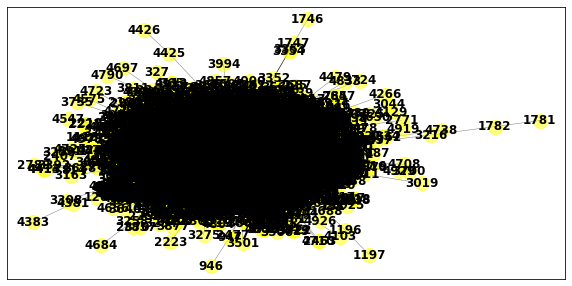

A rede é formada por 5042 Nós e 41791 Arestas


In [19]:
G_advogato = create_network_by_txt(path_advogato, weighted = False)
G_advogato_ppg = preprocess_graph(G_advogato, to_undirected = True, remove_selfloop = False, major_component = True, relabel = True)
plot_network(G_advogato_ppg)
get_network_description(G_advogato_ppg)

A forma mais direta de calcularmos a assortatividade é diretamente pelo Networkx

In [20]:
r = nx.degree_assortativity_coefficient(G_advogato_ppg)
print("Assortativity = ","%.4f"%r)

Assortativity =  -0.0846


Outra forma de se calcular a assortatividade é pegando o coeficiente de Pearson
do gráfico grau-grau entre os nós que tem aresta na rede.

In [21]:
ku_list, kv_list, corr = assortativity_degree_degree(G_advogato_ppg)
print('Pearsons correlation: %.3f'%corr)

Pearsons correlation: -0.085


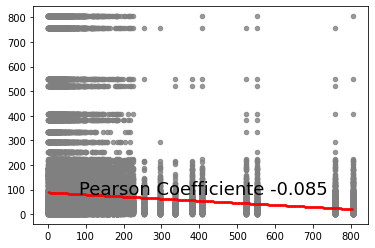

In [22]:
plot_scatter_linear_app(ku_list, kv_list, "Pearson Coefficiente %.3f"%corr)

Pelo gráfico podemos observar que apesar de acharmos o valor do coeficiente de Pearson, o gráfico mal segue uma tendência clara, onde a aproximação linear não se mostra suficiente.

### **5. Calcule o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau de cada vértice para a rede “word_adjacencies”. Isto é, entre k e knn(k). Use apenas o maior componente. Considere o exemplo da aula.**

In [2]:
path_wordadj = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados 2/word_adjacencies.txt"
get_first_lines(path_wordadj, n_lines = 5)

0 1

0 2

0 3

1 2

1 9



Como as outras redes utilizadas até agora, este arquivo é formado pelos nós de origem e destino, sem a presença dos pesos.

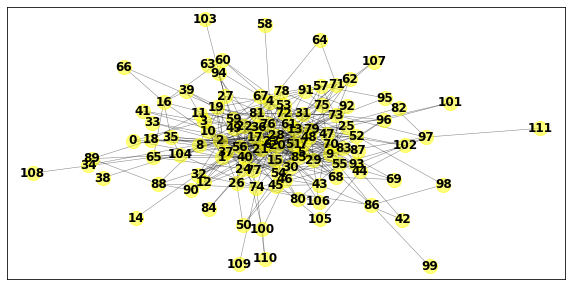

A rede é formada por 112 Nós e 425 Arestas


In [3]:
G_wordadj = create_network_by_txt(path_wordadj, weighted = False)
G_wordadj_ppg = preprocess_graph(G_wordadj, to_undirected = True, remove_selfloop = False, major_component = True, relabel = True)
plot_network(G_wordadj_ppg)
get_network_description(G_wordadj_ppg)

In [23]:
ks, knnk, rho = get_knn_k(G_wordadj_ppg)
print("O coeficiente de Pearson do gráfico k x KNN(k) é %.3f"%rho)

O coeficiente de Pearson do gráfico k x KNN(k) é -0.675


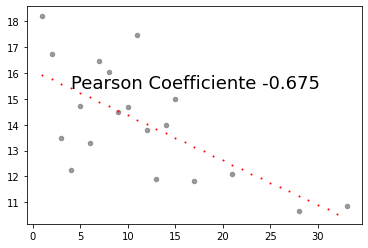

In [16]:
plot_scatter_linear_app(ks, knnk, "Pearson Coefficiente %.3f"%rho)